# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

![msaberpro.png](Archivos/saberpro.png)

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [ ]:
# Implementa tu respuesta en esta celda

#pip install sodapy

# Importar librerias a usar
import numpy as np
import pandas as pd
from sodapy import Socrata
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Se usa el API que tiene integrada la plataforma de Datos Abiertos para extraer el conjunto de datos
# Se hace uso del paquete Socrata con el token personal
client = Socrata("www.datos.gov.co", "qBfC3Dwi5pSQxUNXE8YPbT8gj")

# ID del conjunto de datos a recuperar
# https://www.datos.gov.co/Educaci-n/Resultados-nicos-Saber-11/kgxf-xxbe
# Conjunto de datos: Resultados únicos Saber 11 2010 al 2022
dataset_id = "kgxf-xxbe"

# lista donde se definen los años a trabajar
anios = ['20191','20194','20201','20204','20211','20214','20221','20224']

# Crear dataframe para almacenar los registros de los años seleccionados
data = pd.DataFrame()

# Almacenar la información por cada año elegido
for i in anios:
    # Se utiliza la funcion .get() para recuperar los registros de cada periodo, se coloca limit para extraer menor cantidad de registros
    results = client.get(dataset_id, where ="periodo like '%{}%'".format(i),limit=100000)

    # Convierte los resultados en un DataFrame
    df = pd.DataFrame.from_records(results)
    
    # Une los datos obtenidos al dataframe principal
    data = pd.concat([data,df],ignore_index=True)

In [109]:
# En caso de que se genere error en el API, cargar datos manualmente
ruta = r'Archivos/base_saber_11.csv'
data = pd.read_csv(ruta)

In [148]:
# Cambiar tipo dato a numerico
#data1['periodo']=pd.to_numeric(data1['periodo'])
data['punt_matematicas']=pd.to_numeric(data['punt_matematicas'])
data['punt_sociales_ciudadanas']=pd.to_numeric(data['punt_sociales_ciudadanas'])
data['punt_c_naturales']=pd.to_numeric(data['punt_c_naturales'])
data['punt_lectura_critica']=pd.to_numeric(data['punt_lectura_critica'])
data['punt_ingles']=pd.to_numeric(data['punt_ingles'])
data['punt_global']=pd.to_numeric(data['punt_global'])

# Cambiar tipo dato a string
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].astype(str)
    
data['periodo'] = data['periodo'].astype(str)

# Cambiar tipo dato a datetime
#data['estu_fechanacimiento'] = data['estu_fechanacimiento'].fillna('1900/01/01', inplace = True)
#data['estu_fechanacimiento'] =  pd.to_datetime(data['estu_fechanacimiento'])

In [88]:
# Se seleccionan las variables con las cuales se va a trabajar
variables_selec = ['periodo', 'estu_tipodocumento', 
                   'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 'cole_caracter', 'cole_depto_ubicacion', 
                   'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'cole_nombre_establecimiento', 'cole_nombre_sede',
                   'estu_depto_presentacion', 'estu_depto_reside', 'estu_fechanacimiento', 'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside', 
                   'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad',
                   'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil', 
                   'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora', 
                   'desemp_ingles', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']

In [89]:
# Se eliminan las variables que no estan en la lista de variables seleccionadas
variables_eliminar = [col for col in data.columns if col not in variables_selec]
data1 = data.drop(variables_eliminar, axis=1)

In [77]:
print("Las dimensiones del conjunto de datos son: ")
print("----------------------------------------------------------------------------------------")
print("Filas = " + str(data.shape[0]))
print("Columnas = " + str(data.shape[1]))
data.info()

print("\n")
print("El conjunto de datos tiene los siguientes años con dos periodos de evaluación cada año: ")
print("----------------------------------------------------------------------------------------")

print(data.groupby(['periodo'])['estu_consecutivo'].count())

print("\n")
print("Las variables de interés para dar solución a la problemática planteada son: ")
print("----------------------------------------------------------------------------------------")
data1.info()

print("\n")
print("El porcentaje de datos faltantes o no validos en las variables de intéres es: ")
print("----------------------------------------------------------------------------------------")
((data1.isna().sum()/len(data1))*100).apply(lambda x: "{:2f}%".format(x))

Las dimensiones del conjunto de datos son: 
----------------------------------------------------------------------------------------
Filas = 263573
Columnas = 51
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263573 entries, 0 to 263572
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   periodo                        263573 non-null  object
 1   estu_tipodocumento             263573 non-null  object
 2   estu_consecutivo               263573 non-null  object
 3   cole_area_ubicacion            263573 non-null  object
 4   cole_bilingue                  218192 non-null  object
 5   cole_calendario                263573 non-null  object
 6   cole_caracter                  252650 non-null  object
 7   cole_cod_dane_establecimiento  263573 non-null  object
 8   cole_cod_dane_sede             263573 non-null  object
 9   cole_cod_depto_ubicacion       263573 non-null  object
 10  co

periodo                         0.000000%
estu_tipodocumento              0.000000%
cole_area_ubicacion             0.000000%
cole_bilingue                  17.217621%
cole_calendario                 0.000000%
cole_caracter                   4.144203%
cole_depto_ubicacion            0.000000%
cole_genero                     0.000000%
cole_jornada                    0.000000%
cole_mcpio_ubicacion            0.000000%
cole_naturaleza                 0.000000%
cole_nombre_establecimiento     0.000000%
cole_nombre_sede                0.000000%
estu_depto_presentacion         0.000000%
estu_depto_reside               0.324009%
estu_fechanacimiento            0.005312%
estu_genero                     0.011003%
estu_mcpio_presentacion         0.000000%
estu_mcpio_reside               0.324009%
estu_nacionalidad               0.000000%
estu_pais_reside                0.000000%
estu_privado_libertad           0.000000%
fami_educacionmadre             5.930425%
fami_educacionpadre             5.

##### Estrategia para manejar datos nulos o vacios
Dado que el porcentaje de datos vacios o nulos es bajo y se encuentra principalmente en variables categoricas, lo que se propone es reemplazar estos con el valor más frecuente en cada variable.

In [93]:
# Encuentra las columnas categóricas con NaN
columnas_categoricas_con_nan = data1.columns[data1.isnull().any()].tolist()

# Itera a través de las columnas categóricas y aplica SimpleImputer
for columna in columnas_categoricas_con_nan:
    data1[i] = data1[i].replace('nan', np.nan)
    imputerCat = SimpleImputer(strategy='most_frequent')
    data1[columna] = imputerCat.fit_transform(data1[[columna]])

In [90]:
print("VALIDACIÓN")
print("\n")
print("El porcentaje de datos faltantes o no validos en las variables de intéres es: ")
print("----------------------------------------------------------------------------------------")
((data1.isna().sum()/len(data1))*100).apply(lambda x: "{:2f}%".format(x))

VALIDACIÓN


El porcentaje de datos faltantes o no validos en las variables de intéres es: 
----------------------------------------------------------------------------------------


periodo                        0.000000%
estu_tipodocumento             0.000000%
cole_area_ubicacion            0.000000%
cole_bilingue                  0.000000%
cole_calendario                0.000000%
cole_caracter                  0.000000%
cole_depto_ubicacion           0.000000%
cole_genero                    0.000000%
cole_jornada                   0.000000%
cole_mcpio_ubicacion           0.000000%
cole_naturaleza                0.000000%
cole_nombre_establecimiento    0.000000%
cole_nombre_sede               0.000000%
estu_depto_presentacion        0.000000%
estu_depto_reside              0.000000%
estu_fechanacimiento           0.000000%
estu_genero                    0.000000%
estu_mcpio_presentacion        0.000000%
estu_mcpio_reside              0.000000%
estu_nacionalidad              0.000000%
estu_pais_reside               0.000000%
estu_privado_libertad          0.000000%
fami_educacionmadre            0.000000%
fami_educacionpadre            0.000000%
fami_estratovivi

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

In [8]:
# Implementa tu respuesta en esta celda
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

##### Estadísticas

In [9]:
# Estadisticas descriptivas variables númericas
data1.describe(include=[np.number])

,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,263031.000000,263573.000000,263573.000000,263573.000000,263573.000000,263573.000000
mean,53.327083,52.890391,49.376450,50.795613,54.465180,259.956111
std,15.861841,13.167211,13.139633,11.598172,11.380761,57.636552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,43.000000,39.000000,42.000000,46.000000,215.000000
50%,51.000000,53.000000,49.000000,50.000000,55.000000,256.000000
75%,63.000000,62.000000,59.000000,59.000000,63.000000,302.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,495.000000


In [10]:
# Estadisticas descriptivas variables categoricas
data1.describe(include=[object])

,periodo,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_depto_ubicacion,cole_genero,cole_jornada,cole_mcpio_ubicacion,...,estu_privado_libertad,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles
count,263573,263573,263573,218192,263573,252650,263573,263573,263573,263573,...,263573,247942,247955,246028,253130,252250,252767,247727,252740,263067
unique,6,12,2,2,3,4,34,3,6,1029,...,2,12,12,7,5,2,2,2,2,5
top,20194,TI,URBANO,N,A,ACADÉMICO,VALLE,MIXTO,MAÑANA,BOGOTÁ D.C.,...,N,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,3 a 4,No,Si,Si,Si,A-
freq,100000,218554,221690,201984,209338,150750,42050,251012,104442,43173,...,263475,59892,52956,76778,134062,162186,158976,181970,203956,107285


##### Gráficas

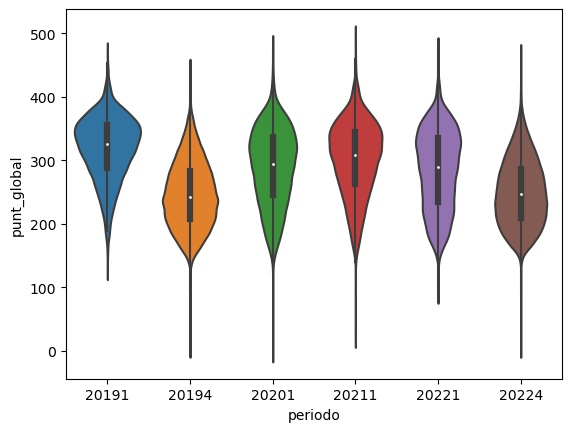

In [101]:
# Box plot puntaje global - genero estudiante
sns.violinplot(y = 'punt_global',
               x = 'periodo',
               data = data1);

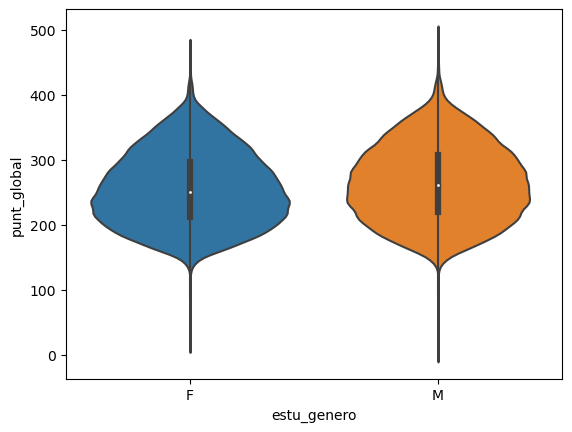

In [96]:
# Box plot puntaje global - genero estudiante
sns.violinplot(y = 'punt_global',
               x = 'estu_genero',
               data = data1);

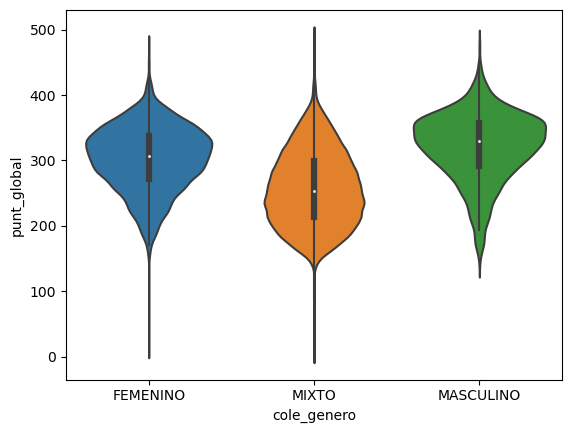

In [97]:
# Box plot puntaje global - genero colegio
sns.violinplot(y = 'punt_global',
               x = 'cole_genero',
               data = data1);

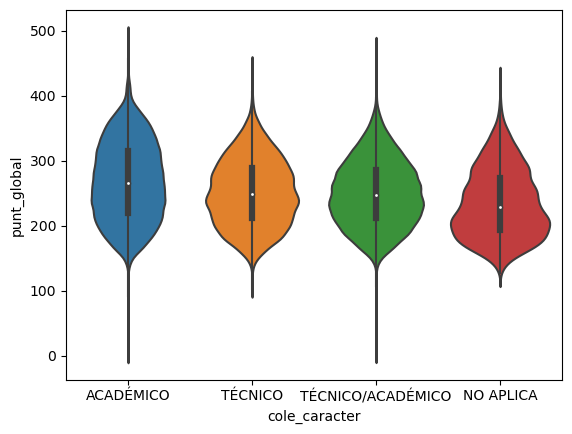

In [98]:
# Box plot puntaje global - caracter colegio
sns.violinplot(y = 'punt_global',
               x = 'cole_caracter',
               data = data1);

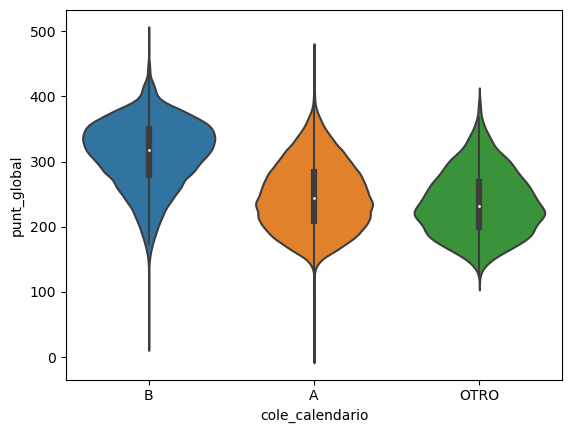

In [99]:
# Box plot puntaje global - calendario colegio
sns.violinplot(y = 'punt_global',
               x = 'cole_calendario',
               data = data1);

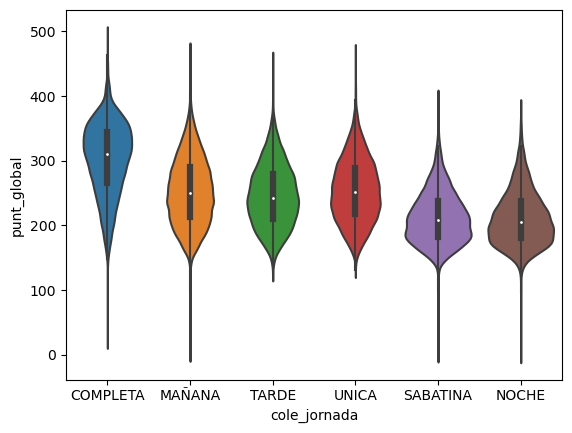

In [100]:
# Box plot puntaje global - jornada colegio
sns.violinplot(y = 'punt_global',
               x = 'cole_jornada',
               data = data1);

###### Conclusiones
Se evidencia que aspectos como género, calendario y jornada del colegio, tienen un impacto en el puntaje global obtenido por el estudiante. 

##### Correlaciones

In [ ]:
# Variables seleccionadas
variables_selec = ['periodo', 'estu_tipodocumento', 
                   'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 'cole_caracter', 
                   'cole_genero', 'cole_jornada', 'cole_naturaleza',
                   'estu_fechanacimiento', 'estu_genero',  
                   'estu_nacionalidad', 'estu_privado_libertad',
                   'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar', 
                   'fami_tienecomputador', 'fami_tieneinternet', 
                   'desemp_ingles', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']

# Se eliminan las variables que no estan en la lista de variables seleccionadas
variables_eliminar = [col for col in data.columns if col not in variables_selec]
data1 = data.drop(variables_eliminar, axis=1)

columnas_no_numericas = data1.select_dtypes(exclude=[np.number]).columns
columnas_numericas = data1.select_dtypes(include=[np.number]).columns

# Mapa asociación variables categoricas y numericas
# Dado que headmap no admite variables categoricas, se calcula el coeficiente de contigencia como medida de asociación entre las variables seleccionadas
import scipy.stats as stats

# Calcular el coeficiente de contingencia para las variables categóricas
association_matrix = pd.DataFrame(index=data1.columns, columns=data1.columns)

# Calcular el coeficiente de contingencia entre cada variable y llenar la matriz de asociación
for col1 in data1.columns:
    for col2 in data1.columns:
        contingency_matrix = pd.crosstab(data1[col1], data1[col2])
        chi2, _, _, _ = stats.chi2_contingency(contingency_matrix)
        association_matrix.loc[col1, col2] = np.sqrt(chi2 / (chi2 + data1.shape[0]))

# Convertir la matriz de asociación a valores numéricos
association_matrix_numeric = association_matrix.astype(float)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor de la matriz de asociación numérica
sns.heatmap(association_matrix_numeric, annot=True, cmap="RdYlBu", fmt=".1f", annot_kws={"size": 10})

# Configurar los ticks del eje x e y con los nombres de las columnas
plt.xticks(ticks=np.arange(len(data1.columns)) + 0.5, labels=data1.columns, rotation=90, ha='center')
plt.yticks(ticks=np.arange(len(data1.columns)) + 0.5, labels=data1.columns, rotation=0, va='center')

# Configurar el título y mostrar el gráfico
plt.title("Matriz de asociación columna a columna (coeficiente de contingencia)")
plt.show()

##### Conclusiones correlacion variables categoricas
Dado que las siguientes variables tienen una correlación alta con la otra variable, estas segundas seran eliminadas para la construcción del modelo.
- periodo y calendario colegio (0.7)
- periodo y fecha nacimiento (0.7)
- nacionalidad y tipo documento estudiante (0.7)
- educación madre y educación padre (0.7)
- nacionalidad estudiante - fecha de nacimiento (0.9)

## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

In [85]:
# Implementa tu respuesta en esta celda
# Librerias usadas en esta fase
from dateutil import parser

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, mean_squared_error, r2_score, mean_absolute_error

# Variables seleccionadas para construir el modelo de regresión
#variables_selec = ['periodo', 'fami_educacionmadre', 'fami_personashogar', 'fami_tienecomputador', 'fami_tieneinternet', 'punt_global']
variables_selec = ['periodo', 'estu_consecutivo','cole_calendario', 'cole_caracter', 'cole_genero', 'cole_jornada', 'cole_naturaleza', 'fami_educacionmadre', 'estu_nacionalidad','fami_personashogar', 'fami_tienecomputador', 'fami_tieneinternet', 'punt_global', 'anio_nacimiento']

# Se eliminan las variables que no estan en la lista de variables seleccionadas
variables_eliminar = [col for col in data.columns if col not in variables_selec]
data2 = data.drop(variables_eliminar, axis=1)

# Variable a predecir
y = data2['punt_global']
y = y.astype(float)
X = data2.drop(columns=['punt_global','estu_consecutivo'])

# Convertir las variables categoricas a variables dummies
X_dummies = pd.get_dummies(X)

# Normalizar las variables
scaler = preprocessing.StandardScaler().fit(X_dummies)
data_normalized = scaler.transform(X_dummies)

# Crear conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y, test_size=0.2)

##### Regresion lineal Statsmodel

In [184]:
y_train = np.asarray(y_train)
y_train = y_train.astype(float)

# Creación del modelo utilizando matrices como en scikitlearn
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train_c = sm.add_constant(X_train, prepend=True)
X_test_c = sm.add_constant(X_test, prepend=True)

modelo = sm.OLS(np.asarray(y_train), X_train_c)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     1832.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:51:02   Log-Likelihood:            -1.0988e+06
No. Observations:              210858   AIC:                         2.198e+06
Df Residuals:                  210778   BIC:                         2.199e+06
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2973      0.100     -2.964      0.0

##### Regresion logistica Scklearn

In [ ]:
# Estandarizar la variable numerica, donde 500 es el valor máximo a obtener en puntaje global
y_est = y / 500

# Definir punto de corte para la clasificación binaria, en este caso se eligio el 30%
corte = 0.3

# Codificiar y binario (si el estudiantiante obtuvo un puntaje mayor a 150 puntos se le asigna 1, de lo contrario 0)
y_est = y_est.apply(lambda x: 1 if x > corte else 0)

# Crear el modelo de regresion logistica
modelo2 = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
modelo2.fit(X_train, y_train)

# Predecir la variable de interes
y_pred = modelo2.predict(X_test)

# Calcular métricas para evaluar modelo
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print('R²: %.2f' % r2_score(y_test, y_pred))

###### Predicciones mejor modelo

In [135]:
mejor_modelo = modelo # regresion lineal

# Predecir toda la base
y_pred = mejor_modelo.predict(data_normalized)

predicciones = pd.DataFrame()
predicciones['estu_consecutivo'] = data2['estu_consecutivo']
predicciones['punt_global_pred'] = y_pred

##### Conclusiones
Las variables seleccionadas para predecir fueron aquellas que mas correlación tienen con la variable predicha, aunque no se obtiene un R2 con el cual el modelo se considere confiable (mayor a 0.8), estas explican razonablemente el comportamiento del puntaje global.

## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [134]:
# Implementa tu respuesta en esta celda
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interactive

### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollarás, a partir de alguno de los análisis realizados, un _script_ que sea relevante en el contexto del problema, acompañado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu anális, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puedes ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en un única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas guía:

* ¿Cómo aporta la segmentación de los datos en categorías de campos al manejo de los datos?
* ¿Qué filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener información relevante?

In [ ]:
# Implementa tu respuesta en esta celda
# Librerias a usar en esata seccion
from pyspark.sql import SparkSession, functions
from pyspark.sql.functions import col, concat_ws

# Inicialización de una sesión de Spark
spark = SparkSession.builder \
                    .master("local[*]") \
                    .appName("Instancia_LAB_2") \
                    .config("spark.sql.warehouse.dir", "./Archivos/") \
                    .enableHiveSupport() \
                    .getOrCreate()

# Se crea un dataframe tipo spark con el dataframe original
# No se uso el mismo dataframe que se uso en los analisis dado que a esa dataframe le faltaban campos a usarse como llaves en spark
data_spark = spark.createDataFrame(data=data,schema=data.columns.tolist())

# Desagregar el Dataframe original y se crear 3 Dataframes para desagregar la información
# 1. Contiene la información de las pruebas por estudiante (puntajes obtenidos por estudiante)
pruebas_df = data_spark.selectExpr([col for col in data_spark.columns if col.startswith("periodo") or col.startswith("punt") or col.startswith("desemp") or col.startswith("estu_consecutivo")]).distinct()

# 2. Contiene la información de cada estudiante
estudiantes_df = data_spark.selectExpr([col for col in data_spark.columns if col.startswith("estu") or col.startswith("estu_consecutivo") or col.startswith("cole_codigo_icfes")]).distinct()
#estudiantes_df = estudiante_df.withColumn("llave_colegio", concat_ws("", *["cole_cod_dane_establecimiento", "cole_cod_dane_sede"]))
#estudiantes_df = estudiante_df.drop("cole_cod_dane_establecimiento", "cole_cod_dane_sede")

# 3. Contiene la información de cada colegio
colegios_df = data_spark.selectExpr([col for col in data_spark.columns if col.startswith("cole")]).distinct()
#colegios_df = colegio_df.withColumn("llave_colegio", concat_ws("", *["cole_cod_dane_establecimiento", "cole_cod_dane_sede"]))

# 4. Contiene la información de la familia de cada estudiante
familias_df = data_spark.selectExpr([col for col in data_spark.columns if col.startswith("fami") or col.startswith("estu_consecutivo")]).distinct()

# Crear Dataframe con las predicciones del mejor modelo
predicciones_df = spark.createDataFrame(data=predicciones,schema=predicciones.columns.tolist())

# Se crea la lista de las base de datos a crear
bd_a_crear = ["saber_11_db"]

# Se crea las bases de datos
for i in bd_a_crear:
    spark.sql(f"CREATE DATABASE IF NOT EXISTS {i}")
bd = spark.sql("SHOW DATABASES")
bd = bd.filter(col("namespace") != "default")

spark_bases_de_datos_df = crear_varios_db(bd_a_crear)
spark_bases_de_datos_df.show()

# Cargar tablas a la base de datos creada
tablas_a_crear = ['pruebas_df','estudiantes_df', 'colegios_df', 'familias_df', 'predicciones_df']

pruebas_df.createOrReplaceTempView("pruebas_df")
estudiantes_df.createOrReplaceTempView("estudiantes_df")
colegios_df.createOrReplaceTempView("colegios_df")
familias_df.createOrReplaceTempView("familias_df")
predicciones_df.createOrReplaceTempView("predicciones_df")
    
for i in tablas_a_crear:
    spark.sql(f"CREATE TABLE IF NOT EXISTS saber_11_db.{i} STORED AS ORC AS SELECT * FROM {i}")
df = spark.sql(f"SHOW TABLES IN saber_11_db")
df = df.filter(df.isTemporary == False)
df = df.select("tableName")

print("\n")
print("Se crearon las siguientes tablas en la base de datos: ")
print("----------------------------------------------------------------------------------------")
df.show()

##### Queries

In [168]:
# Consulta para unir las cuatro tablas y formar una tabla consolidada (se selecciona principales campos)
consulta = \
'''\
SELECT a.estu_tipodocumento
    ,  a.estu_consecutivo
    ,  a.estu_fechanacimiento
    ,  a.estu_genero
    ,  a.estu_nacionalidad
    ,  b.periodo
    ,  b.punt_global
    ,  c.cole_bilingue
    ,  c.cole_calendario
    ,  c.cole_caracter
    ,  c.cole_genero
    ,  c.cole_jornada
    ,  c.cole_naturaleza
    ,  d.fami_educacionmadre
    ,  d.fami_educacionpadre
    ,  d.fami_estratovivienda
    ,  d.fami_personashogar
    ,  d.fami_tienecomputador
    ,  d.fami_tieneinternet
FROM saber_11_db.estudiantes_df a
JOIN saber_11_db.pruebas_df b ON a.estu_consecutivo = b.estu_consecutivo
JOIN saber_11_db.colegios_df c ON a.cole_codigo_icfes = c.cole_codigo_icfes
JOIN saber_11_db.familias_df d ON a.estu_consecutivo = d.estu_consecutivo
ORDER BY a.estu_consecutivo ASC
LIMIT 10;
'''

data_consolidada = spark.sql(consulta)
data_consolidada.show()

In [174]:
# Consulta del puntaje promedio de los estudiantes, agrupado por año y por colegio
consulta = \
'''\
SELECT SUBSTRING(b.periodo,0,4) anio
    ,  c.cole_nombre_establecimiento
    ,  ROUND(AVG(b.punt_global),2) avg_punt_global
FROM saber_11_db.estudiantes_df a
JOIN saber_11_db.pruebas_df b ON a.estu_consecutivo = b.estu_consecutivo
JOIN saber_11_db.colegios_df c ON a.cole_codigo_icfes = c.cole_codigo_icfes
GROUP BY 1,2
ORDER BY 1 ASC;
'''

punt_prom = spark.sql(consulta)
punt_prom.show()

+----+---------------------------+---------------+
|anio|cole_nombre_establecimiento|avg_punt_global|
+----+---------------------------+---------------+
|2019|       INSTITUCION EDUCA...|          244.9|
|2019|       INSTITUCION EDUCA...|         216.25|
|2019|                 I.E. JUNIN|          179.5|
|2019|       COLEGIO GARCES NA...|         227.86|
|2019|       INSTITUCION EDUCA...|         215.14|
|2019|       ASPAEN GIMNASIO C...|          368.7|
|2019|       INST EDUC FELIX H...|         244.67|
|2019|       COLEGIO MAYOR DE ...|         342.27|
|2019|       COLEGIO LEONARDO ...|         263.95|
|2019|       INSTITUTO PITAGOR...|          234.0|
|2019|            I. E. LOS ANDES|         212.28|
|2019|       COLEGIO LA AMISTA...|         248.43|
|2019|       IE JUAN BAUTISTA ...|         341.13|
|2019|        COL PRIMERO DE MAYO|         301.25|
|2019|            COL SANTO ANGEL|         325.54|
|2019|       COL DE LA PRESENT...|          311.5|
|2019|       COLEGIO REAL DE B.

In [178]:
predicciones_df

DataFrame[estu_consecutivo: string, punt_global_pred: double]

In [180]:
# Consulta para calcular el error para cada registro 
# Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba
consulta = \
'''\
SELECT a.estu_consecutivo
    ,  ROUND((b.punt_global - c.punt_global_pred),2) error_predicciones
FROM saber_11_db.estudiantes_df a
JOIN saber_11_db.pruebas_df b ON a.estu_consecutivo = b.estu_consecutivo
JOIN saber_11_db.predicciones_df c ON a.estu_consecutivo = c.estu_consecutivo
;
'''

error_reg = spark.sql(consulta)
error_reg.show()

+----------------+------------------+
|estu_consecutivo|error_predicciones|
+----------------+------------------+
|SB11201910019471|            -46.93|
|SB11201910011547|            -22.45|
|SB11201910017949|             56.33|
|SB11201910013808|             -55.6|
|SB11201910040522|            -46.66|
|SB11201910016590|              59.9|
|SB11201910003091|              7.22|
|SB11201910025659|               5.6|
|SB11201910007691|              4.58|
|SB11201910016406|             40.85|
|SB11201910010876|            -21.25|
|SB11201910026570|              32.1|
|SB11201910018963|             21.76|
|SB11201910011991|              58.2|
|SB11201910005491|              9.34|
|SB11201910011705|             11.45|
|SB11201910004921|            -39.89|
|SB11201910045456|            -42.07|
|SB11201910005056|              31.2|
|SB11201910030121|             56.05|
+----------------+------------------+
only showing top 20 rows



In [ ]:
# Consulta para calcular el error total de los registros de entrenamiento y el error total de los registros de prueba 
consulta = \
'''\
SELECT a.estu_consecutivo
    ,  ROUND((b.punt_global - c.punt_global_pred),2) error_predicciones
FROM saber_11_db.estudiantes_df a
JOIN saber_11_db.pruebas_df b ON a.estu_consecutivo = b.estu_consecutivo
JOIN saber_11_db.predicciones_df c ON a.estu_consecutivo = c.estu_consecutivo
;
'''

error_train_test = spark.sql(consulta)
error_train_test.show()

In [181]:
# Consulta del puntaje promedio por departamento, ordenado de mayor a menor
consulta = \
'''\
SELECT c.cole_depto_ubicacion
    ,  ROUND(AVG(b.punt_global),2) avg_punt_global
    ,  COUNT(DISTINCT c.cole_nombre_establecimiento) cant_colegios
FROM saber_11_db.estudiantes_df a
JOIN saber_11_db.pruebas_df b ON a.estu_consecutivo = b.estu_consecutivo
JOIN saber_11_db.colegios_df c ON a.cole_codigo_icfes = c.cole_codigo_icfes
GROUP BY 1
ORDER BY 2 DESC;
'''

punt_dpto = spark.sql(consulta)
punt_dpto.show()

+--------------------+---------------+-------------+
|cole_depto_ubicacion|avg_punt_global|cant_colegios|
+--------------------+---------------+-------------+
|              BOGOTA|         343.56|           49|
|              BOGOTÁ|         289.57|         1397|
|               VALLE|         279.81|          878|
|        CUNDINAMARCA|          273.3|          844|
|           SANTANDER|         270.39|          579|
|             QUINDIO|         266.56|          103|
|              CALDAS|         266.49|          236|
|              BOYACA|         266.06|          394|
|           RISARALDA|         263.99|          210|
|           ATLANTICO|         262.45|          570|
|               CAUCA|         256.07|          471|
|     NORTE SANTANDER|         254.11|          323|
|              NARIÑO|         253.83|          397|
|               HUILA|         251.89|          272|
|            CASANARE|         250.79|          103|
|           ANTIOQUIA|         249.98|        

##### Conclusiones
- La segmentacion de los datos por categoria optimizan el proceso de consulta y manipulacion de los datos, dado que teniendo la información en un solo dataframe es mas demorado hacer calculos. Por el contrario, teniendo los datos en diferentes tablas con llaves que la unen entre si, se extraen los campos a usar.
- Las agrupaciones que implican mas de dos campos es mas facil aplicar mediante SQL, y se pueden aplicar varios tipos de agregación lo que permiten tener mayor información relevante.

## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022